In [33]:
#!unzip /content/drive/MyDrive/MyShares/traffic_signs/traffic_signs.zip -d /content/drive/MyDrive/MyShares/traffic_signs

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf 
import seaborn as sns
import pandas as pd
import random
import pickle

In [35]:
with open('/content/drive/MyDrive/MyShares/traffic_signs/train.p', mode = 'rb' ) as training_data:
  train = pickle.load(training_data)

with open('/content/drive/MyDrive/MyShares/traffic_signs/test.p', mode = 'rb' ) as testing_data:
  test = pickle.load(testing_data)

with open('/content/drive/MyDrive/MyShares/traffic_signs/valid.p', mode = 'rb' ) as val_data:
  val = pickle.load(val_data)

In [36]:
x_train , y_train = train['features'] , train['labels']
x_test , y_test = test['features'] , test['labels']
x_val , y_val = val['features'] , val['labels']

In [37]:
x_train.shape

(34799, 32, 32, 3)

In [38]:
y_train.shape

(34799,)

#image visualization

3

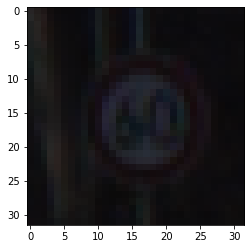

In [39]:
i = np.random.randint(1 , len(x_train))
plt.imshow(x_train[i])
y_train[i]

In [40]:
class_labels = pd.read_csv('/content/drive/MyDrive/MyShares/traffic_signs/signnames.csv')
class_labels['ClassId'].value_counts().sum()  # number of classes

43

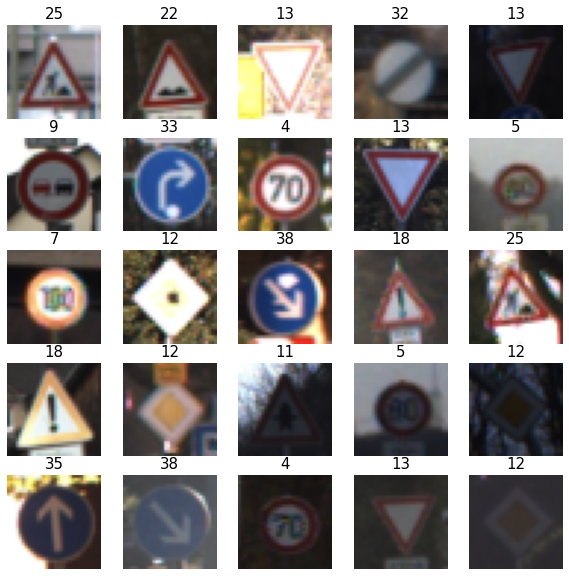

In [41]:
w_grid = 5
l_grid = 5

fig , axes = plt.subplots(w_grid , l_grid , figsize = (10 , 10))

a = axes.ravel()  #flatte the 5 x 5 matrix to 25

n_training = len(x_train)

for i in np.arange(0 , w_grid * l_grid):
  index = np.random.randint(0 , n_training)
  a[i].imshow(x_train[index])
  a[i].set_title(y_train[index] , fontsize = 15)
  a[i].axis('off')

#grayscal and image normalization

In [42]:
from sklearn.utils import shuffle

x_train , y_train = shuffle(x_train , y_train)
x_test , y_test = shuffle(x_test , y_test)
x_val , y_val = shuffle(x_val , y_val)

In [43]:
x_train_gray = x_train.mean(axis=3 , keepdims=True).astype(np.float32) #the actual shape is (.. , 32 ,32 ,3) so the axis we want avg is 3
x_test_gray = x_test.mean(axis=3 , keepdims=True).astype(np.float32)
x_val_gray = x_val.mean(axis=3 , keepdims = True).astype(np.float32)



x_train_gray_norm = (x_train_gray - 128) / 128         # values between -1 to 1
x_test_gray_norm = (x_test_gray - 128)/128
x_val_gray_norm = (x_val_gray - 128)/ 128

In [44]:
x_train_gray_norm.shape

(34799, 32, 32, 1)

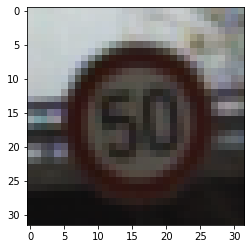

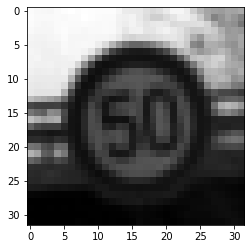

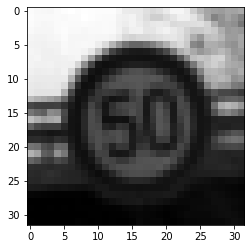

In [45]:
i = np.random.randint(0 , len(x_train))

plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray[i].squeeze() , cmap='gray')
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze() , cmap= 'gray')

In [46]:
from tensorflow.keras import layers , datasets , models

#building the model

In [47]:

model = models.Sequential()
model.add(layers.Conv2D(6 , (3,3) , activation = 'relu' , input_shape = (32 , 32 , 1)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(16 , (3 , 3) , activation = 'relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128 , activation ='relu'))
model.add(layers.Dense(64 , activation = 'relu'))
model.add(layers.Dense(43 , activation = 'softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)              

In [48]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train_gray_norm , 
          y_train , 
          epochs = 30,
          batch_size = 128,
          validation_data = (x_val_gray_norm , y_val),
          verbose = 1)

Epoch 1/30
272/272 [==============================] - 2s 5ms/step - loss: 2.9611 - accuracy: 0.2243 - val_loss: 1.0931 - val_accuracy: 0.7002
Epoch 2/30
272/272 [==============================] - 1s 4ms/step - loss: 0.7771 - accuracy: 0.7743 - val_loss: 0.6337 - val_accuracy: 0.8222
Epoch 3/30
272/272 [==============================] - 1s 4ms/step - loss: 0.4209 - accuracy: 0.8824 - val_loss: 0.4697 - val_accuracy: 0.8744
Epoch 4/30
272/272 [==============================] - 1s 4ms/step - loss: 0.2982 - accuracy: 0.9150 - val_loss: 0.4131 - val_accuracy: 0.8941
Epoch 5/30
272/272 [==============================] - 1s 4ms/step - loss: 0.2330 - accuracy: 0.9340 - val_loss: 0.3935 - val_accuracy: 0.8982
Epoch 6/30
272/272 [==============================] - 1s 4ms/step - loss: 0.1997 - accuracy: 0.9431 - val_loss: 0.3737 - val_accuracy: 0.8975
Epoch 7/30
272/272 [==============================] - 1s 4ms/step - loss: 0.1670 - accuracy: 0.9521 - val_loss: 0.3622 - val_accuracy: 0.9023
Epoch 

#evaluating the model

In [49]:
score = model.evaluate(x_test_gray_norm , y_test)
print(score[1])       #score[0] is loss , score[1] is the accuracy

395/395 [==============================] - 1s 2ms/step - loss: 0.4632 - accuracy: 0.9184
0.918368935585022


In [50]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'training and val loss')

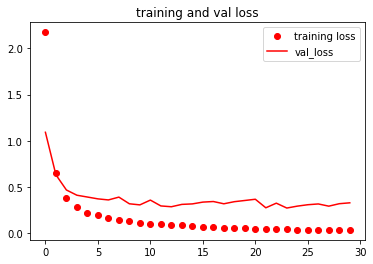

In [53]:
epochs = range(len(accuracy))

plt.plot(epochs , loss , 'ro' ,label = 'training loss')
plt.plot(epochs , val_loss , 'r' , label = 'val_loss')
plt.legend()
plt.title('training and val loss')

Text(0.5, 1.0, 'training and val accuracy')

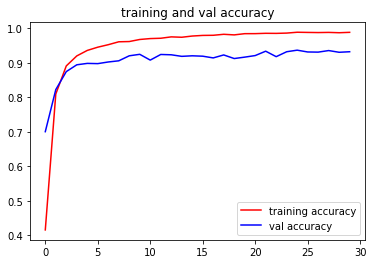

In [54]:
plt.plot(epochs , accuracy , 'r' ,label = 'training accuracy')
plt.plot(epochs , val_accuracy , 'b' , label = 'val accuracy')
plt.legend()
plt.title('training and val accuracy')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


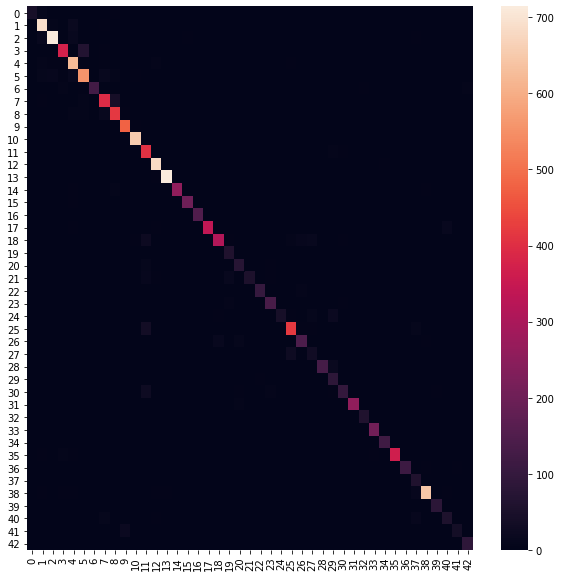

In [62]:
from sklearn.metrics import confusion_matrix

preds = model.predict_classes(x_test_gray_norm)

cm = confusion_matrix(y_test , preds)
plt.figure(figsize=(10 , 10))
sns.heatmap(cm)
